In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

# Titanic Data Investigation

In [3]:
data = pd.read_csv('titanic-data.csv')

## Data Overview

What does our data look like?

The dataset I am working with is a well known one involving passenger data for those who embarked on the infamous Titanic voyage. The data is in tabular form and consists of basic ticket information for all passengers. Below is a small sample of the data:

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Features:

In [5]:
for col in data.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


### Size:
Number of rows

In [6]:
len(data)

891

### Are there any null values

In [7]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

The numbers indicate that info is not always filled for Age, Cabin, and Embarked (Port). The listed numbers indicate how many non-null values there are for each feature. Eg 891 means no null values, 714 indicates there are (891 - 713 = 17) null values.

#### A note about Age:
Of the factors involved in this investigation, age is the only one in which there are null values. When age is used in a graphic, I chose to drop all rows where age is not present. I did this because a relatively small proportion of the rows had null values, so I assumed there would be a minimal impact on my analysis. I chose not to impute a value for age because I felt that using mean or median would not be realistic or helpful.

## Question:

The dataset has a 'survived' column indicating whether the passenger survived the accident. I wanted to explore which factors were most important in determining a passenger's survival. Specifically I wanted to see whether my preconcieved notions about which passengers survived (upper class, women) were supported by the data. 

## The Exploration

### By Class

Given the standards of the day it seems obvious that those in the upper classes would be more likely to survive the accident, and this is well supported by the data. The graphic below shows the proportion of passengers who survived by passenger class, a good proxy for socio-economic status. We see from the graphic that well over half of those in the highest class survived well the lowest class had a survival rate of only about 25%. 

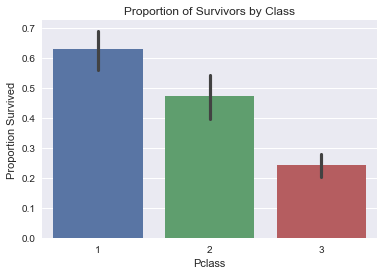

In [26]:
ax = sns.barplot(x='Pclass', y='Survived', data=data)
ax.set_ylabel('Proportion Survived')
ax.set_title('Proportion of Survivors by Class')

### By Gender

The next graphic shows the expected pattern for gender with most women surviving, while only a small fraction of men managed to. 

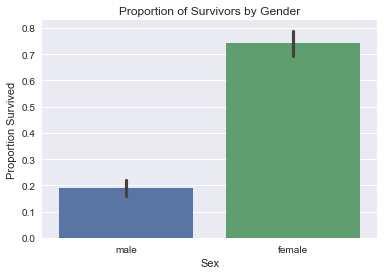

In [27]:
ax = sns.barplot(x='Sex', y='Survived', data=data)
ax.set_ylabel('Proportion Survived')
ax.set_title('Proportion of Survivors by Gender')

### By Gender and Sex

I wanted to explore these relationships even further by dividing people into groups by both class and gender. What you see is that women are much more likely to survive across all classes, but with the difference being most pronounced in class 2 where the women have nearly the same survival rate as class 1, but the men's survival rate is barely better than those of class 3. It is also interesting to note that class 3 women were still more likely to survive than class 3 men, indicating that gender was a more important factor in survival than class. 

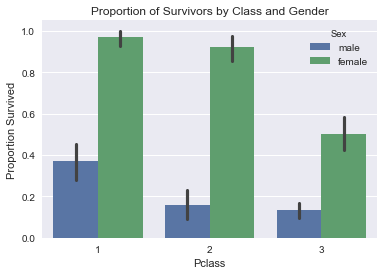

In [28]:
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
ax.set_ylabel('Proportion Survived')
ax.set_title('Proportion of Survivors by Class and Gender')

### By Age

I also expected age to be an important factor in determining survival, but found the actual relationship to be a little bit muddled. The box-plot below shows the mean age of survivors was actually slightly higher than those who died although the interquartile range is lower. 

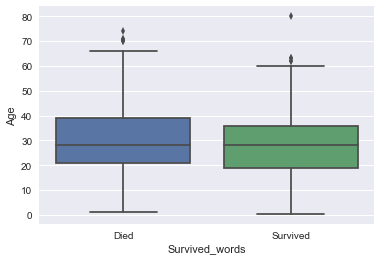

In [29]:
# remapped for the graphics
data['Survived_words'] = data.Survived.map({0: 'Died', 1: 'Survived'})
sns.boxplot(x='Survived_words', y='Age', data=data)
ax.set_title('Age of Survivors vs Non-Survivors')

### By Age and Sex

Surprised by the last result, I decided to explore the relationship between age and survival further by breaking it down by sex as well. Again the relationship is muddled without large differences between any of the groups, although the women who died did skew younger than the others. 

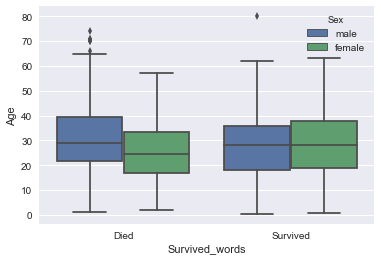

In [30]:
sns.boxplot(x='Survived_words', y='Age', hue='Sex', data=data)
ax.set_title('Age of Survivors vs Non-Survivors by Gender')

### By Age and Class

My next thought was that maybe the results were confounded by class. The box-plot below lends some support for that notion, indicating that amongst the same class, survivors were typically younger than those who died. 

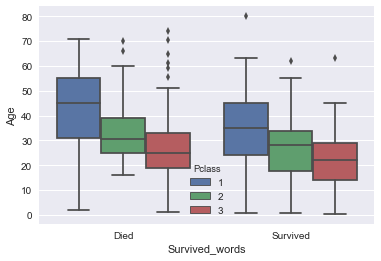

In [31]:
sns.boxplot(x='Survived_words', y='Age', hue='Pclass', data=data)
ax.set_title('Age of Survivors vs Non-Survivors Class')

### Distribution of Age

Shown below is the distribution of age of survivors (blue) and those who died (green) overlaid over each other. I noticed a large spike near the left side of the distribution for those who survived. This made me wonder if maybe instead of focusing on average age, I should subset my groups into distinct categgories of adults and children. 

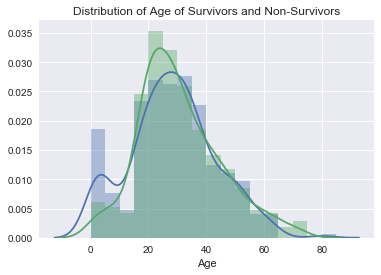

In [32]:
_bins = range(0, 86, 5)
fig, ax = plt.subplots()

idx = (data.Survived == 1) & (pd.notnull(data.Age))
sns.distplot(data[idx].Age, ax=ax, bins=_bins)

idx = (data.Survived == 0) & (pd.notnull(data.Age))
sns.distplot(data[idx].Age, ax=ax, bins=_bins)

ax.set_title('Distribution of Age of Survivors and Non-Survivors')

In [20]:
data.loc[data.Age < 18, 'age_category'] = 'child'
data.loc[data.Age >= 18, 'age_category'] = 'adult'

### Comparing raw differences

Looking at the raw numbers it is apparent that a larger proportion of children survived than adults. 

In [21]:
data[data.age_category == 'child'].Survived.value_counts()

1    61
0    52
Name: Survived, dtype: int64

In [22]:
data[data.age_category == 'adult'].Survived.value_counts()

0    372
1    229
Name: Survived, dtype: int64

### By gender among children

I thought it might be interesting to compare the age for those who survived between genders looking only at those  under 18. The results show drastic age differences between the genders with the average age of surviving girls being much older than surviving boys. This would lead me to believe that only very young boys were likely to make their way on to life boats, while many more teenage girls were allowed. 

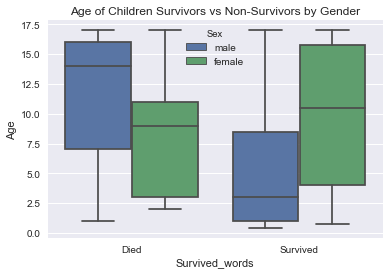

In [37]:
ax = sns.boxplot(x='Survived_words', y='Age', hue='Sex', data=data[data.age_category == 'child'])
ax.set_title('Age of Children Survivors vs Non-Survivors by Gender')

### Raw counts

Displayed are the raw survival counts for each group of children. I wanted to confirm I wasn't looking at very small sample sizes in the graphic above. 

In [24]:
data[data.age_category == 'child'].groupby(['Sex', 'Survived']).apply(len).reset_index().rename(columns={0:'count'})

,Sex,Survived,count
0,female,0,17
1,female,1,38
2,male,0,35
3,male,1,23


### By gender among adults

The pattern we saw for children does not hold true among adults. Although there are age differences by gender, they are not nearly as prounounced. 

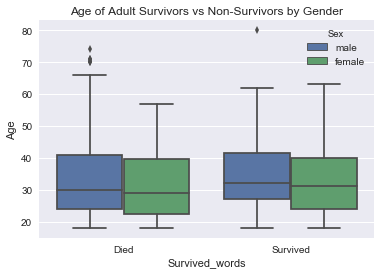

In [38]:
ax = sns.boxplot(x='Survived_words', y='Age', hue='Sex', data=data[data.age_category == 'adult'])
ax.set_title('Age of Adult Survivors vs Non-Survivors by Gender')

## Limitations

One major limitation with this dataset is that it doesn't appear to include *all* the passengers. A quick google [search](http://www.history.com/topics/titanic) indicates that the Titanic had over 2500 people on board while as the data has less than half of that. There could be some selection bias in this data, so conclusions should be taken with a grain of salt. Also worth noting is that there were some empty values for Age meaning that not all available data is included in the analysis.

## Conclusion

With a dataset such as this one, I'm sure that given enough time I could tease out any relationship I wanted. However, I think it is interesting that in general the results match my intuition. First, gender and class appear to be the most important factors for determining survival. Second, age plays a role, although this relationship is slightly less clear. It appears that among adolescants and young adults, girls were much more likely to survive than boys, although that difference mattered less among small children. I think these results are in line with what we might expect given the standards of the day.  